# NLP and Supervised Learning (classification of text data)

In [96]:
import pandas as pd

import missingno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.pipeline import Pipeline

In [97]:
data_url = 'https://raw.githubusercontent.com/mo-amininasab/Twitter_US_Airline_Sentiment/main/Tweets.csv'
df = pd.read_csv(data_url)

In [98]:
df.shape

(14640, 15)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [100]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Missing data

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

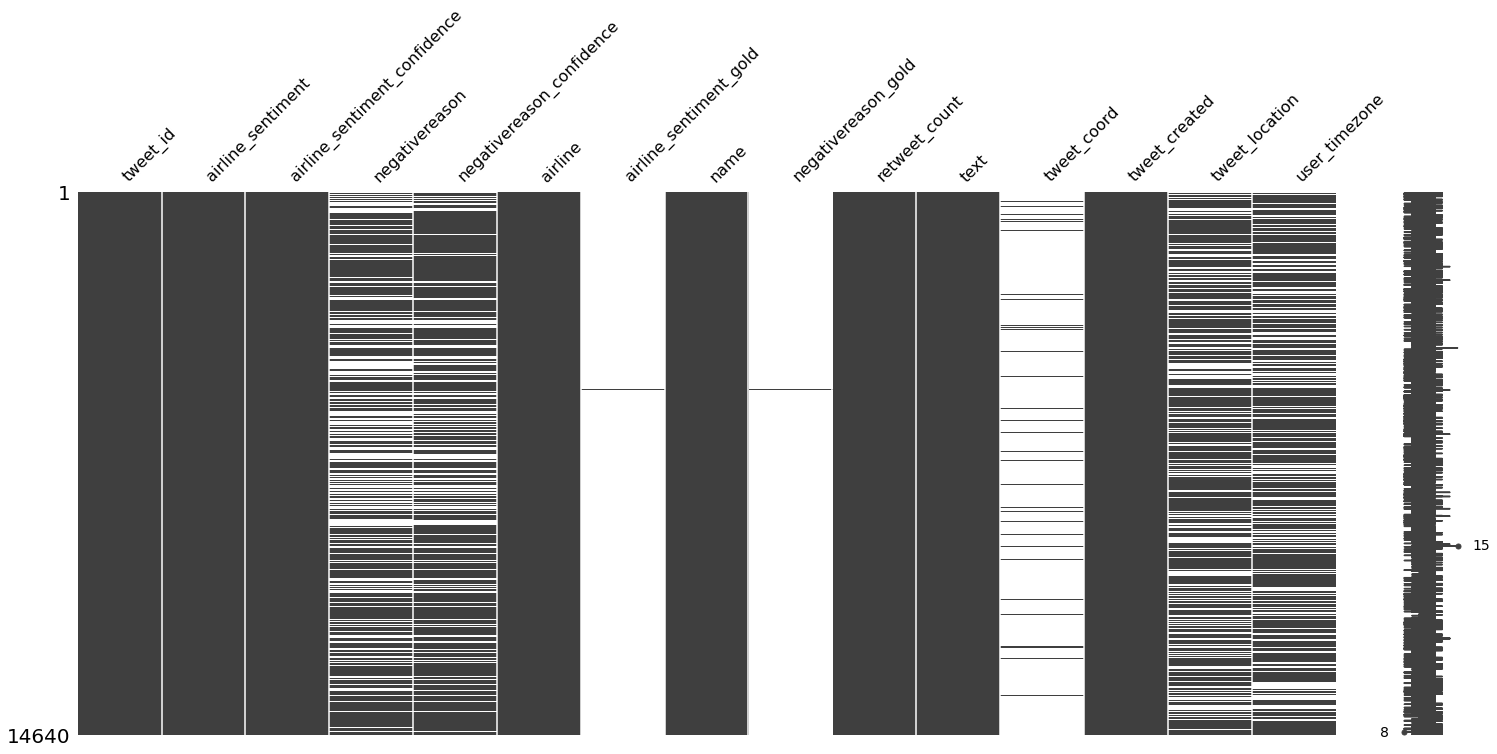

In [101]:
missingno.matrix(df)
df.isna().sum()

## EDA

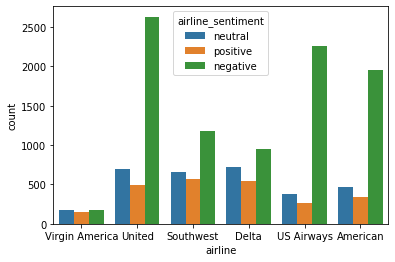

In [102]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')

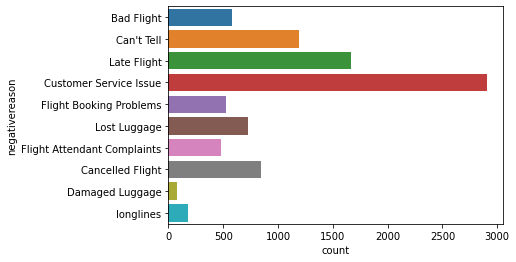

In [103]:
sns.countplot(data=df, y='negativereason')

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

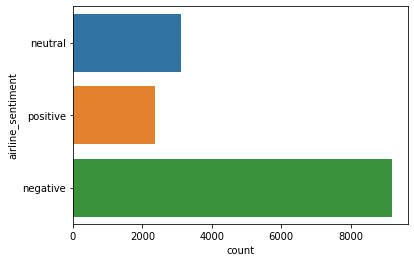

In [104]:
sns.countplot(data=df, y='airline_sentiment')
df['airline_sentiment'].value_counts()

## Prepare data for model

### Features and label


In [105]:
data = df[['airline_sentiment', 'text']]

In [106]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [107]:
X = df['text']
y = df['airline_sentiment']

### Train test split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=101)

### Vectorization

In [109]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [110]:
tfidf.vocabulary_

{'united': 12022,
 'hi': 6014,
 'relative': 9648,
 'flight': 5168,
 'booking': 2645,
 'problems': 9187,
 'number': 8319,
 'my8yb4': 7968,
 'clarita': 3269,
 'jaramillo': 6689,
 'mejia': 7657,
 'thank': 11341,
 'americanair': 1889,
 'served': 10313,
 'nastiest': 8035,
 'food': 5293,
 'ive': 6645,
 'seen': 10262,
 'yesterday': 12872,
 'rubber': 10005,
 'chicken': 3192,
 'slime': 10566,
 'entire': 4690,
 'cabin': 2900,
 'sent': 10294,
 'fas': 4986,
 'confirm': 3525,
 'yes': 12869,
 'partly': 8684,
 'used': 12189,
 'del': 4000,
 'ewr': 4799,
 'return': 9835,
 'cancelled': 2947,
 'flightled': 5197,
 'technical': 11273,
 'glitch': 5630,
 'operations': 8479,
 'jetblue': 6725,
 'helping': 5989,
 'bunch': 2828,
 'trying': 11717,
 'time': 11472,
 'fly': 5239,
 'terrible': 11311,
 'service': 10316,
 'ruined': 10013,
 'vacation': 12231,
 'lostsuitcase': 7341,
 'noreimbursement': 8246,
 'usairways': 12170,
 '2hrs': 593,
 'late': 7048,
 'flightr': 5205,
 'finally': 5096,
 'taking': 11213,
 'new': 81

In [111]:
len(tfidf.vocabulary_)

12971

In [112]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [113]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

## Model comparisons - *Naive Bayes*, *LogisticRegression*, *LinearSVC*


### Naive Bayes

In [114]:
def report(model):
  preds = model.predict(X_test_tfidf)
  print(classification_report(y_test, preds))
  plot_confusion_matrix(model, X_test_tfidf, y_test)

In [115]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


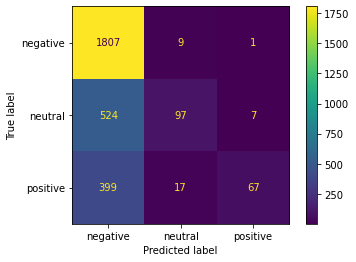

In [116]:
report(nb)

### Logistic regression

In [117]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


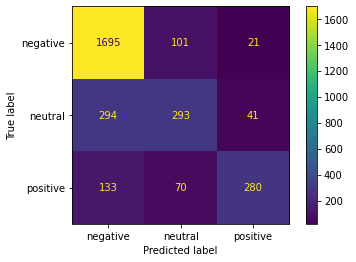

In [118]:
report(log)

### Linear SVC

In [119]:
svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)

LinearSVC()

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


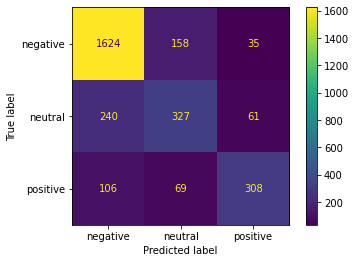

In [120]:
report(svc)

## Finalizing a pipeLine for deployment on new tweets

In [121]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('svc', LinearSVC())])

In [122]:
pipe.fit(df['text'], df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [123]:
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [124]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [125]:
new_tweet = ['ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)